### **Hamiltonian and Commutation Analysis**

We consider the Hamiltonian
$$
H = -g \frac{w_{0}}{2}X_0X_1 -g{\frac{w_{0}}{2}} Y_0Y_1 - g\frac{w_{1}}{2} X_1X_2 - g\frac{w_{1}}{2} Y_1Y_2 .
$$
The corresponding unitary time evolution is
$$
U(t) = e^{-itH}.
$$
If a Hamiltonian can be written as a sum of commuting parts, \( H = A + B \) with \( [A,B]=0 \), then the unitary evolution factorizes exactly as
$$
e^{-itH} = e^{-itA} e^{-itB}.
$$
If the terms do not commute, this exact factorization is not possible.

We group the Hamiltonian as
$$
H = aH_{01} + bH_{12},
$$
where
$$
H_{01} = X_0X_1 + Y_0Y_1, \quad
H_{12} = X_1X_2 + Y_1Y_2.
$$
and $a = -g\frac{w_{0}}{2}$ and $b = -g\frac{w_{1}}{2}$


Within each group, the terms commute:
$$
[X_0X_1, Y_0Y_1] = 0, \quad
[X_1X_2, Y_1Y_2] = 0.
$$
However, the two groups share qubit 1, and Pauli operators acting on the same qubit do not commute. Consequently,
$$
[H_{01}, H_{12}] \neq 0,
$$
and the full Hamiltonian contains non-commuting terms.

### **Trotterized Time Evolution**

Since the Hamiltonian terms do not commute, the exact unitary evolution cannot be written as a single product of exponentials. To approximate the evolution, we use the Suzuki–Trotter decomposition.

The first-order Trotter approximation is
$$
e^{-itH}
\approx
\left(
e^{-i\Delta t a H_{01}}
e^{-i\Delta t b H_{12}}
\right)^n,
\quad
\Delta t = \frac{t}{n}.
$$

The approximation improves as the number of Trotter steps $n$ increases and becomes exact in the limit $n \to \infty$.

### **Circuit Construction**

We'll use the same method that we have used in our original document to create circuit for both $H_{01}$ and $H_{12}$. We start from $-Z_{0}$ as our simple Hamiltonian and try to reach the desired unitaries using 
$$
H = U^{\dagger} H_{0} U
$$
In case of $H_{01}$, we have two unitaries and there corresponding gate decomposition follows 
- **STRING 1**: $X_{0}X_{1}$
$$
e^{ i \theta_{0}  X_{0}X_{1}} = U^{\dagger} (Z_{0}) U
$$
where $\theta_{0} = \frac{gw_{0}}{2} \Delta t$ and,
$$
U = e^{i \frac{\pi}{4} X_{0}} e^{i \frac{\pi}{4}Z_{0}X_{1}}
$$
with
$$
e^{i \frac{\pi}{4}Z_{0}X_{1}} = e^{i \frac{\pi}{4} X_{1}} e^{i \frac{\pi}{4}Z_{0}} e^{-i \frac{\pi}{4}}CNOT^{0 \to 1}
$$
Hence, we can write the full circuit as
$$
e^{- i \Delta t a X_{0}X_{1}}  = CNOT^{0 \to 1} S_{0} R_{0}^{x}\left(\frac{\pi}{2}\right) \times \left(U_{1}^{0}(\theta_{0})\right)^{\dagger} \times  R_{0}^{x}\left(-\frac{\pi}{2}\right)S_{0}^{\dagger} CNOT^{0 \to 1} \tag{1}
$$
- **STRING 2**:  $Y_{0}Y_{1}$
In this case, we'll need two extra rotations, hence we get
$$
U = e^{i \frac{\pi}{4} X_{0}} e^{i \frac{\pi}{4}Z_{0}X_{1}} e^{i \frac{\pi}{4} Z_{0}} e^{i \frac{\pi}{4} Z_{1}}
$$
and the corresponding circuit will be, 
$$
e^{i \theta_{0} Y_{0}Y_{1}} = S_{0}S_{1} CNOT^{0 \to 1} S_{0} R_{0}^{x}\left(\frac{\pi}{2}\right) \times \left(U_{1}^{0}(\theta_{0})\right)^{\dagger} \times R_{0}^{x}\left(-\frac{\pi}{2}\right) S_{0}^{\dagger} CNOT^{0 \to 1}  S_{1}^{\dagger} S_{0}^{\dagger} \tag{2}
$$

Similarly, In case of H_{12},
- **STRING 1**: $X_{1}X_{2}$
This is similar as for string 1 of $H_{01}$, we just need to replace $0 \to 1$, $1 \to 2$, and $\theta_{0} \to \theta_{1}$, where $\theta_{1} = \frac{gw_{1}}{2}\Delta t$,
$$
e^{i \theta_{1} X_{1}X_{2}} =  CNOT^{1 \to 2} S_{1} R_{1}^{x}\left(\frac{\pi}{2}\right) \times \left(U_{1}^{1}(\theta_{1})\right)^{\dagger} \times  R_{1}^{x}\left(-\frac{\pi}{2}\right)S_{1}^{\dagger} CNOT^{1 \to 2} \tag{3}
$$
- **STRING 2**: $Y_{1}Y_{2}$
This one is similar to string 2 of $H_{01}$, with same replacements as previous, hence

$$
e^{i \theta_{1} Y_{1}Y_{2}} = S_{1}S_{2} CNOT^{1 \to 2} S_{1} R_{1}^{x}\left(\frac{\pi}{2}\right) \times \left(U_{1}^{1}(\theta_{1})\right)^{\dagger} \times R_{1}^{x}\left(-\frac{\pi}{2}\right) S_{1}^{\dagger} CNOT^{1 \to 2}  S_{2}^{\dagger} S_{1}^{\dagger} \tag{4}
$$


We can now put these together to create circuit for the unitary evolution of our Hamiltonian.

In [1]:
import qiskit
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram,plot_distribution
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, QiskitRuntimeService
from qiskit_aer import Aer, AerSimulator
from qiskit.circuit.library import UGate
import pylatexenc
import numpy as np

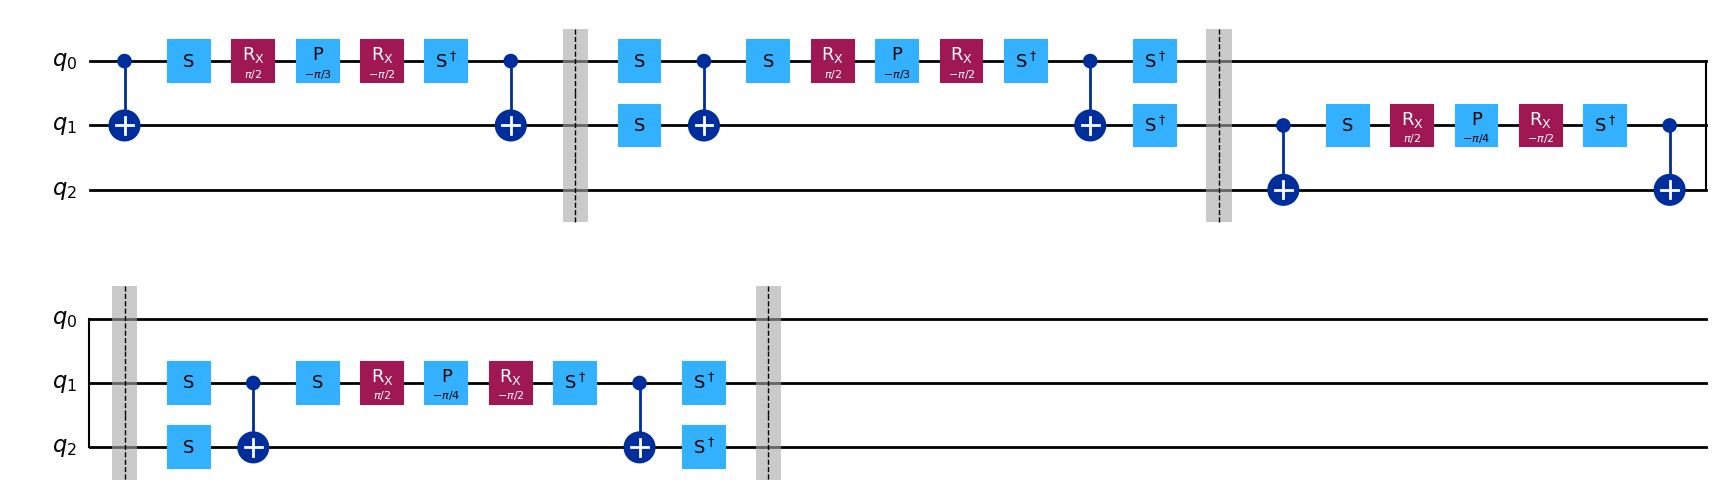

In [8]:
# Random angles
theta_0 = np.pi / 3
theta_1 = np.pi / 4

# Largest qubit index is 2, so we need 3 qubits
qc = QuantumCircuit(3)

# ----------------- Subcircuit 1 -----------------
qc.cx(0, 1)
qc.s(0)
qc.rx(np.pi/2, 0)
qc.p(-theta_0, 0)  # U1^0†
qc.rx(-np.pi/2, 0)
qc.sdg(0)
qc.cx(0, 1)
qc.barrier()

# ----------------- Subcircuit 2 -----------------
qc.s(0)
qc.s(1)
qc.cx(0, 1)
qc.s(0)
qc.rx(np.pi/2, 0)
qc.p(-theta_0, 0)  # U1^0†
qc.rx(-np.pi/2, 0)
qc.sdg(0)
qc.cx(0, 1)
qc.sdg(1)
qc.sdg(0)
qc.barrier()

# ----------------- Subcircuit 3 -----------------
qc.cx(1, 2)
qc.s(1)
qc.rx(np.pi/2, 1)
qc.p(-theta_1, 1)  # U1^1†
qc.rx(-np.pi/2, 1)
qc.sdg(1)
qc.cx(1, 2)
qc.barrier()

# ----------------- Subcircuit 4 -----------------
qc.s(1)
qc.s(2)
qc.cx(1, 2)
qc.s(1)
qc.rx(np.pi/2, 1)
qc.p(-theta_1, 1)  # U1^1†
qc.rx(-np.pi/2, 1)
qc.sdg(1)
qc.cx(1, 2)
qc.sdg(2)
qc.sdg(1)
qc.barrier()

# Draw the full circuit
qc.draw('mpl')


### **Trotterization**

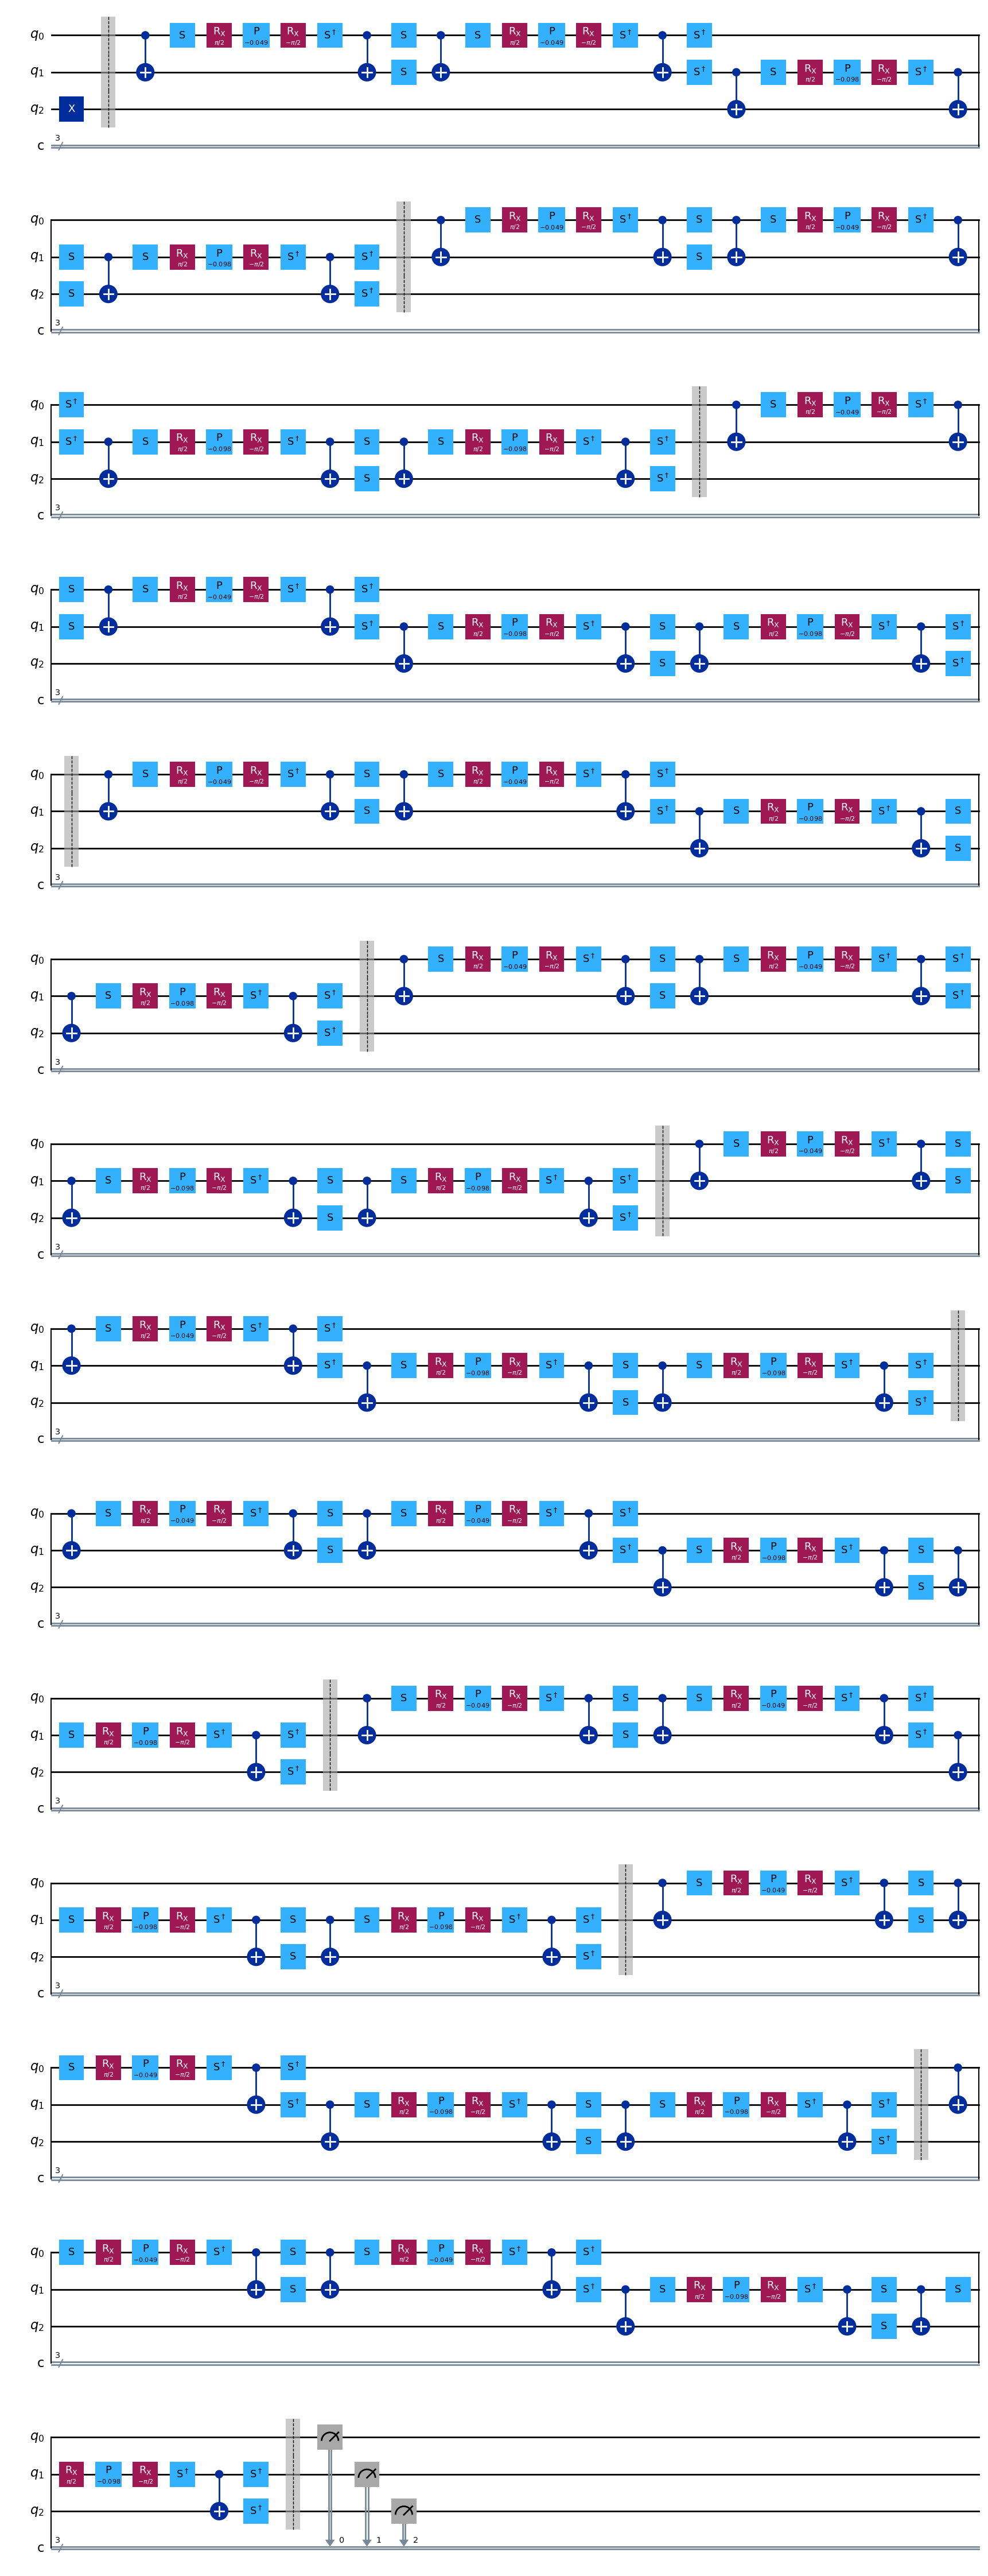

In [6]:
# Parameters
g = 9.8
w0_0 = 0.1
w0_1 = 0.2
n = 10  # number of Trotter steps

theta_0 = g * w0_0 / (2 * n)
theta_1 = g * w0_1 / (2 * n)

# Initialize 3-qubit circuit
qreg = QuantumRegister(3, name="q")
creg = ClassicalRegister(3, name="c")
trot_qc = QuantumCircuit(qreg,creg)

# ----------------- Set initial state |0 0 1> -----------------
trot_qc.x(2)  # Flip qubit 2 to |1>, qubits 0 and 1 are already |0>

# Build Trotterized circuit
for step in range(1, n+1):
    trot_qc.barrier()  # separate Trotter steps visually

    # ----------------- Subcircuit 1 -----------------
    trot_qc.cx(0, 1)
    trot_qc.s(0)
    trot_qc.rx(np.pi/2, 0)
    trot_qc.p(-theta_0, 0)  # U1^0†
    trot_qc.rx(-np.pi/2, 0)
    trot_qc.sdg(0)
    trot_qc.cx(0, 1)

    # ----------------- Subcircuit 2 -----------------
    trot_qc.s(0)
    trot_qc.s(1)
    trot_qc.cx(0, 1)
    trot_qc.s(0)
    trot_qc.rx(np.pi/2, 0)
    trot_qc.p(-theta_0, 0)  # U1^0†
    trot_qc.rx(-np.pi/2, 0)
    trot_qc.sdg(0)
    trot_qc.cx(0, 1)
    trot_qc.sdg(1)
    trot_qc.sdg(0)

    # ----------------- Subcircuit 3 -----------------
    trot_qc.cx(1, 2)
    trot_qc.s(1)
    trot_qc.rx(np.pi/2, 1)
    trot_qc.p(-theta_1, 1)  # U1^1†
    trot_qc.rx(-np.pi/2, 1)
    trot_qc.sdg(1)
    trot_qc.cx(1, 2)

    # ----------------- Subcircuit 4 -----------------
    trot_qc.s(1)
    trot_qc.s(2)
    trot_qc.cx(1, 2)
    trot_qc.s(1)
    trot_qc.rx(np.pi/2, 1)
    trot_qc.p(-theta_1, 1)  # U1^1†
    trot_qc.rx(-np.pi/2, 1)
    trot_qc.sdg(1)
    trot_qc.cx(1, 2)
    trot_qc.sdg(2)
    trot_qc.sdg(1)

# Final barrier
trot_qc.barrier()
trot_qc.measure([0,1,2], [0,1,2])

# Draw the Trotterized circuit with initial state
trot_qc.draw('mpl')


Raw Counts: {'100': 315, '010': 677, '001': 32}


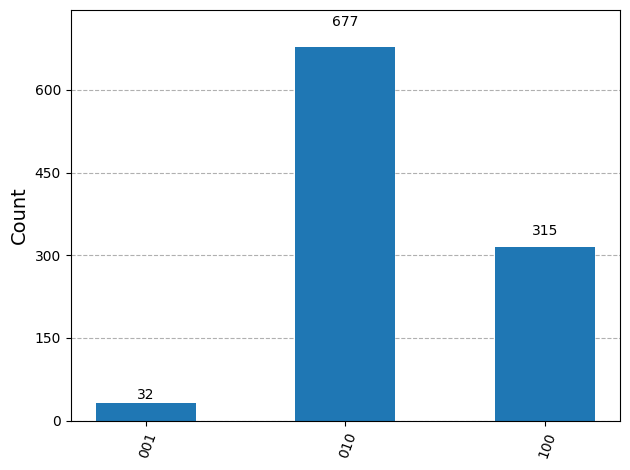

In [7]:
backend = AerSimulator()
pass_manager = generate_preset_pass_manager(backend=backend, optimization_level=2)
trotqc_transpiled = pass_manager.run(trot_qc)

sampler = Sampler(mode=backend)
job_result = sampler.run([trotqc_transpiled], shots=1024).result()
counts = job_result[0].data.c.get_counts()
# Note: The exact access pattern may vary with Qiskit version;
# sometimes it's .data.c or .data.meas — adjust accordingly based on your transpiled circuit.

print("Raw Counts:", counts)
plot_histogram(counts)